## Description: 
- This project aims to explore what are the most needed , jobs and skills in a software industry in Egypt (first stage), and then design and provide scientific courses for these requirements.

#                                        LABOR MARKET ANALYSIS
- An in-depth analysis of the labor market and its requirements in the field of software development and engineering

## The golden question 
- What courses should the company provide?
 - Sub Questions 
   - 1-	What is the most in-demand job in the market in Egypt (top 10 job based on job level)?
   - 2-	What are the most frequent job requirements (in each job based on job level)?
   - 3-	Comparison between the market in 2020 last quarter and the market between 2014 and 2016
   - 4-	What is the average salary in Each job?
   - 5-	How many job opportunities are there? In the top ten in each level?
   - 6-	Are there any website provide this requirements ? 


# ِAnalysis Section || One

# Gathering The data

In [1]:
# import the needed libraries
import pandas as pd 
from pandas import DataFrame
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
#Loading the first data set for the last 3 month of wuzzaf jobs
df_jobs2020=pd.read_csv("wuzzaf_2020.csv")

# Assessing 

In [3]:
df_jobs2020.head(2)

,#PAGE_URL,title,company-name,job-link,job-link_link,short-description-,location
0,https://wuzzuf.net/a/IT-Software-Development-J...,Sales Supervisor - North Upper Egypt,PepsiCo International,Sales Supervisor - North Upper Egypt,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt"
1,https://wuzzuf.net/a/IT-Software-Development-J...,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Junior Technical Support Engineer - Upper Egypt,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt"


In [4]:
df_jobs2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #PAGE_URL           2580 non-null   object
 1   title               2580 non-null   object
 2   company-name        2580 non-null   object
 3   job-link            2580 non-null   object
 4   job-link_link       2580 non-null   object
 5   short-description-  2580 non-null   object
 6   location            2580 non-null   object
dtypes: object(7)
memory usage: 141.2+ KB


In [5]:
df_jobs2020.title.value_counts().head(5)

Software Developer      18
Front End Developer     17
IT Specialist           17
Graphic Designer        17
Full Stack Developer    16
Name: title, dtype: int64

In [6]:
df_jobs2020.location.value_counts()

Maadi, Cairo            439
Cairo, Egypt            340
Nasr City, Cairo        328
New Cairo, Cairo        288
Heliopolis, Cairo       144
                       ... 
Fayoum, Egypt             1
Victoria, Alexandria      1
Luxor, Egypt              1
Minya, Egypt              1
Quweisna, Monufya         1
Name: location, Length: 113, dtype: int64

### Assessing Result 

- 1  Tow Columns Contain Data that does't important to our analysis
- 2  We Need to rename column's name to be more Readable 
- 3  Description column will divided it into 2 differ columns
    - a- Level
    - b- Type
- 4  Some companies hide their data (such as company name).

# Cleaning

In [7]:
df_jobs2020c=df_jobs2020.copy()

## Define
- Drop (#page URL and job_link)

## Code

In [8]:
df_jobs2020c = df_jobs2020c.drop(['#PAGE_URL','job-link'], axis = 1)

## Test

In [9]:
df_jobs2020c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               2580 non-null   object
 1   company-name        2580 non-null   object
 2   job-link_link       2580 non-null   object
 3   short-description-  2580 non-null   object
 4   location            2580 non-null   object
dtypes: object(5)
memory usage: 100.9+ KB


## Define
- Rename Columns (title , company-name , job-link_link , short-description- )

## Code

In [10]:
df_jobs2020c = df_jobs2020c.rename(columns = {'title':'job_title','company-name': 'company','job-link_link': 'job_profile','short-description-':'description'})

## Test

In [11]:
df_jobs2020c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_title    2580 non-null   object
 1   company      2580 non-null   object
 2   job_profile  2580 non-null   object
 3   description  2580 non-null   object
 4   location     2580 non-null   object
dtypes: object(5)
memory usage: 100.9+ KB


In [12]:
df_jobs2020c['company'].replace(' ', np.nan, inplace=True) 

In [13]:
df_jobs2020c["company"].fillna("Hidden Name",inplace=True)

## Define 
-  Description column will divided it into 2 differ columns 
- 1- Extract level from description column for each job post and fill it in Level column 
- 2- Extract Job Type from description column for each job post and fill it in Type column 
 
 

## Code Part 1

In [14]:
 Description_Data=df_jobs2020c.description

In [15]:
Level_list=[]
for Temporary_variable in Description_Data:
    if('Entry Level' in Temporary_variable):
        Level_list.append('Entry Level')
    elif('Experienced' in Temporary_variable):
        Level_list.append('Experienced')
    elif('Manager'or 'Senior Management'in lev):
        Level_list.append('Manager')
    elif('Internship'in Temporary_variable):
        Level_list.append('Internship')
    else:
        Level_list.append(Temporary_variable)     

## Test

In [16]:
Level_list[:5]

['Manager', 'Entry Level', 'Experienced', 'Experienced', 'Experienced']

In [17]:
len(Level_list)

2580

In [18]:
len(df_jobs2020c)

2580

In [19]:
df = DataFrame (Level_list,columns=['Level'])
print (df)

            Level
0         Manager
1     Entry Level
2     Experienced
3     Experienced
4     Experienced
...           ...
2575  Experienced
2576  Experienced
2577  Experienced
2578      Manager
2579  Experienced

[2580 rows x 1 columns]


In [20]:
df_jobs2020c['Level']=Level_list

In [21]:
df_jobs2020c.head(2)

,job_title,company,job_profile,description,location,Level
0,Sales Supervisor - North Upper Egypt,PepsiCo International,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Manager
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Entry Level


## Code Part 2

In [22]:
Job_Description_Data=df_jobs2020c.description
Type_list=[]
for temp_Job_Description_Data in Job_Description_Data:
    if('Full Time' in temp_Job_Description_Data):
        Type_list.append('Full Time')
    elif('Internship' in temp_Job_Description_Data):
        Type_list.append('Internship')
    elif('Full Time'and'Part Time' in temp_Job_Description_Data):
        Type_list.append('Full Time And Part Time')
    elif('Full Time 'and' Part Time 'and' Work From Home'in temp_Job_Description_Data):
        Type_list.append('Full Time And Part Time And Work From Home')
    elif('Part Time'in temp_Job_Description_Data):
        Type_list.append('Part Time')
    else:
        Type_list.append('Full Time')  

In [23]:
Type_list[:5]

['Full Time', 'Full Time', 'Full Time', 'Full Time', 'Full Time']

In [24]:
df_jobs2020c['Type']=Type_list

# Define
- Filter job titles into categories

# Code

In [25]:
x=df_jobs2020c.job_title

In [26]:
Group_list=[]
for temp_jobtitle in x:
    if("IT" in temp_jobtitle):
        Group_list.append('IT Category')
    elif('Software'or "Full Stack"or"Developer"or"End"or"end" in temp_jobtitle):
        Group_list.append('Software Engneering ')
    else:
        Group_list.append(x)  

In [27]:
df_jobs2020c['StandardJobTitle']=Group_list
len(Group_list)

2580

## Test

In [28]:
df_jobs2020c.StandardJobTitle

0       Software Engneering 
1       Software Engneering 
2       Software Engneering 
3       Software Engneering 
4       Software Engneering 
                ...         
2575    Software Engneering 
2576    Software Engneering 
2577    Software Engneering 
2578    Software Engneering 
2579    Software Engneering 
Name: StandardJobTitle, Length: 2580, dtype: object

# Divide the main DataSet into three subsets
- Full DataSets with All jobs Levels
- Data sets For ( Entry Level , Experienced Level , Management Level )

In [29]:
df_entry=df_jobs2020c[df_jobs2020c["Level"]=="Entry Level"]
df_entry[:2]

,job_title,company,job_profile,description,location,Level,Type,StandardJobTitle
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Entry Level,Full Time,Software Engneering
7,Software Quality Control Engineer,Bnsights,https://wuzzuf.net/jobs/p/c9874cab-e008-49ac-8...,Full Time · Entry Level · 0-3 Yrs of Exp · Com...,"New Cairo, Cairo",Entry Level,Full Time,Software Engneering


In [30]:
df_exper=df_jobs2020c[df_jobs2020c["Level"]=="Experienced"]
df_exper[:2]

,job_title,company,job_profile,description,location,Level,Type,StandardJobTitle
2,Software Developer,Rednet It Services,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo",Experienced,Full Time,Software Engneering
3,Senior Software Quality Control Engineer,Bnsights,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo",Experienced,Full Time,Software Engneering


In [31]:
df_mang=df_jobs2020c[df_jobs2020c["Level"]=="Manager"]
df_mang[:2]

,job_title,company,job_profile,description,location,Level,Type,StandardJobTitle
0,Sales Supervisor - North Upper Egypt,PepsiCo International,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Manager,Full Time,Software Engneering
9,Software Development Manager,Nahdet Misr Publishing Group,https://wuzzuf.net/jobs/p/bcd03e2d-9e2b-46ca-9...,Full Time · Manager · 10+ Yrs of Exp · Softwar...,"Mohandessin, Giza",Manager,Full Time,Software Engneering


# Saving Cleaned Data And divided it into 3 Data Sets

In [32]:
df_jobs2020c.to_csv("wuzzafCleaned2020.csv", index = False)
df_entry.to_csv("WuzzafEntryleveljobs2020.csv", index = False)
df_exper.to_csv("wuzzafexperiencedjobs2020.csv", index = False)
df_mang.to_csv("wuzzafmangerjobs2020.csv", index = False)

# Analysis Wuzzaf's Data Set Section One || Part one 
-  Answering the Question below 
- 1- Top 10 jops In General 
- 2- Top 10 company In General 
- 3- Locations of compaines In General 

In [33]:
df=pd.read_csv("./wuzzafCleaned2020.csv")

In [34]:
df.head(2)

,job_title,company,job_profile,description,location,Level,Type,StandardJobTitle
0,Sales Supervisor - North Upper Egypt,PepsiCo International,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Manager,Full Time,Software Engneering
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Entry Level,Full Time,Software Engneering


In [35]:
df.job_title.value_counts()

Software Developer                            18
Front End Developer                           17
IT Specialist                                 17
Graphic Designer                              17
Full Stack Developer                          16
                                              ..
Software Sales Executive                       1
Java Spring Boot Developer                     1
Application Support Specialist– Sales Buzz     1
Senior Full Stack Nodejs Developer             1
Design Manager                                 1
Name: job_title, Length: 1764, dtype: int64

In [36]:
df.StandardJobTitle.describe()

count                     2580
unique                       2
top       Software Engneering 
freq                      2413
Name: StandardJobTitle, dtype: object

In [37]:
df.job_title.describe()

count                   2580
unique                  1764
top       Software Developer
freq                      18
Name: job_title, dtype: object

<AxesSubplot:title={'center':' Most Job category in 2020 '}>

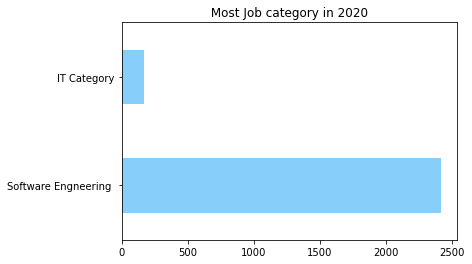

In [38]:
StandardJobTitle = df['StandardJobTitle'].value_counts()[:2]
StandardJobTitle.plot(kind = 'barh',color = "lightskyblue",title=' Most Job category in 2020 ')

<AxesSubplot:title={'center':'Most 10 offers during the last quarter of 2020 '}>

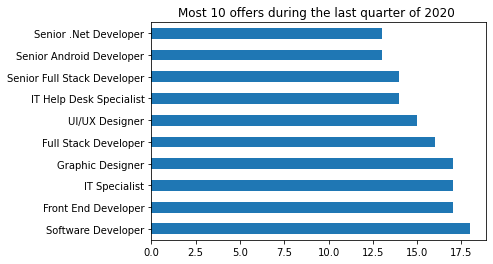

In [39]:
title = df['job_title'].value_counts()[:10]
title.plot(kind='barh', title='Most 10 offers during the last quarter of 2020 ') 

In [40]:
df.location.value_counts()

Maadi, Cairo            439
Cairo, Egypt            340
Nasr City, Cairo        328
New Cairo, Cairo        288
Heliopolis, Cairo       144
                       ... 
Fayoum, Egypt             1
Victoria, Alexandria      1
Luxor, Egypt              1
Minya, Egypt              1
Quweisna, Monufya         1
Name: location, Length: 113, dtype: int64

<AxesSubplot:title={'center':'Geographical distribution of jobs'}>

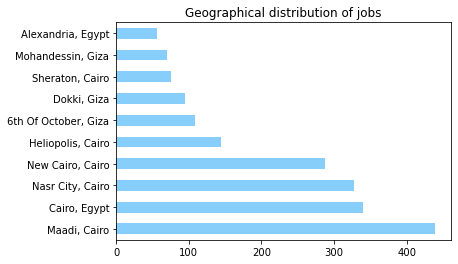

In [41]:
location = df['location'].value_counts()[:10]
location.plot(kind = 'barh',color = "lightskyblue",title='Geographical distribution of jobs')


In [42]:
df.company.describe()

count            2580
unique            983
top       Hidden Name
freq              277
Name: company, dtype: object

<AxesSubplot:title={'center':'Most employing companies'}>

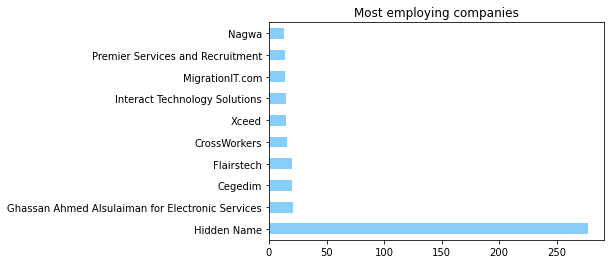

In [43]:
company = df['company'].value_counts()[:10]
company.plot(kind = 'barh',color = "lightskyblue",title='Most employing companies')

In [44]:
df.Type.describe()

count          2580
unique            3
top       Full Time
freq           2487
Name: Type, dtype: object

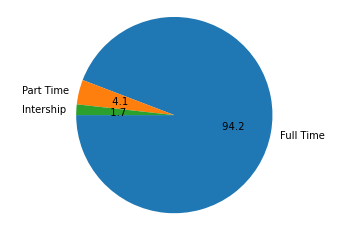

In [45]:
pieLabels = 'Full Time', 'Part Time', 'Intership'
job_typeShare = [2430/2580,105/2580,45/2580 ]
figureObject, axesObject = plt.subplots()
axesObject.pie(job_typeShare,labels=pieLabels, autopct='%5.1f',startangle=180)
axesObject.axis('equal')
plt.show()


In [46]:
df.Level.describe()

count            2580
unique              3
top       Experienced
freq             1674
Name: Level, dtype: object

<AxesSubplot:>

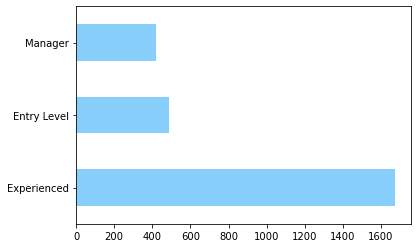

In [47]:
location = df['Level'].value_counts()[:3]
location.plot(kind = 'barh',color = "lightskyblue")

In [48]:
df.Level.value_counts()

Experienced    1674
Entry Level     485
Manager         421
Name: Level, dtype: int64

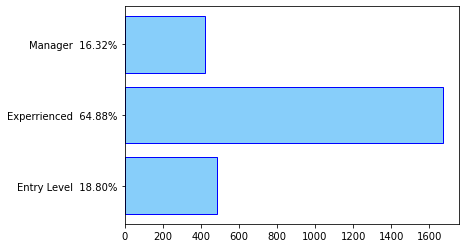

In [49]:
total = 2580
langs = ['Entry Level', 'Experrienced', 'Manager']
langs_users_num = np.array([485, 1674, 421])
percent = langs_users_num/total*100
new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(langs, percent)]
plt.barh(langs, langs_users_num, color='lightskyblue', edgecolor='blue' )
plt.yticks(range(len(langs)), new_labels)
plt.show()

# Analysis For Entry Level Section One || Part 2

-  Answering the Question below 
- 1- Top 10 jops 
- 2- Top 10 company  
- 3- Locations of compaines 


In [50]:
df=pd.read_csv("./WuzzafEntryleveljobs2020.csv")

In [51]:
df.head(2)

,job_title,company,job_profile,description,location,Level,Type,StandardJobTitle
0,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Entry Level,Full Time,Software Engneering
1,Software Quality Control Engineer,Bnsights,https://wuzzuf.net/jobs/p/c9874cab-e008-49ac-8...,Full Time · Entry Level · 0-3 Yrs of Exp · Com...,"New Cairo, Cairo",Entry Level,Full Time,Software Engneering


In [52]:
df.job_title.value_counts()

IT Help Desk Specialist                            12
Software Developer                                  8
IT Specialist                                       6
Front End Developer                                 6
IT Help Desk                                        5
                                                   ..
HR ERP Implementation Consultant                    1
Development & Operations Specialist - Indonesia     1
Interior Designer / Architect                       1
Furniture Product Designer                          1
PHP Developer                                       1
Name: job_title, Length: 380, dtype: int64

<AxesSubplot:title={'center':'Most 10 offers during the last quarter of 2020'}>

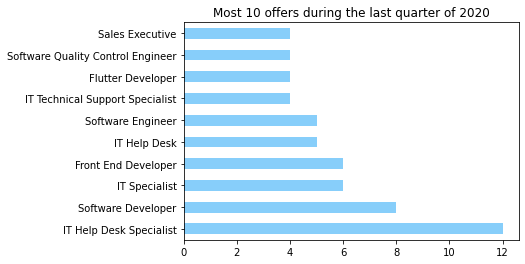

In [53]:
location = df['job_title'].value_counts()[:10]
location.plot(kind = 'barh',color = "lightskyblue",title='Most 10 offers during the last quarter of 2020')

<AxesSubplot:title={'center':' Most Job category in 2020 '}>

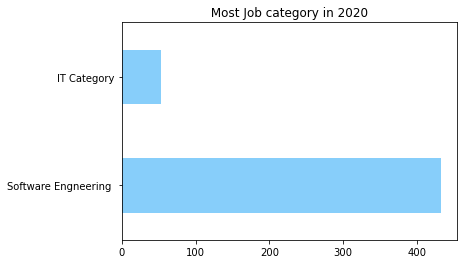

In [54]:
StandardJobTitle = df['StandardJobTitle'].value_counts()[:2]
StandardJobTitle.plot(kind = 'barh',color = "lightskyblue",title=' Most Job category in 2020 ')

<AxesSubplot:title={'center':'Most employing companies'}>

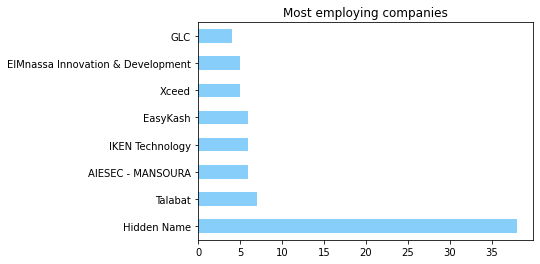

In [55]:
company = df['company'].value_counts()[:8]
company.plot(kind = 'barh',color = "lightskyblue",title='Most employing companies')

<AxesSubplot:title={'center':'Geographical distribution of jobs'}>

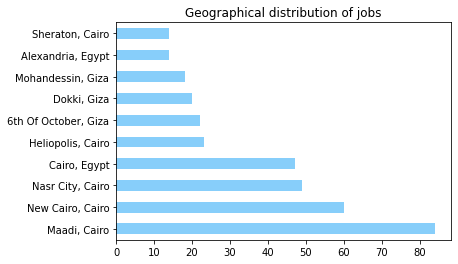

In [56]:
location = df['location'].value_counts()[:10]
location.plot(kind = 'barh',color = "lightskyblue",title='Geographical distribution of jobs')

# Analysis For Experince Jobs Section One || Part 3

-  Answering the Question below 
- 1- Top 10 jops 
- 2- Top 10 company  
- 3- Locations of compaines 

In [57]:
df = pd.read_csv ('./wuzzafexperiencedjobs2020.csv')

In [58]:
df.describe()

,job_title,company,job_profile,description,location,Level,Type,StandardJobTitle
count,1674,1674,1674,1674,1674,1674,1674,1674
unique,1154,724,1664,1601,85,1,2,2
top,Senior Full Stack Developer,Hidden Name,https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Experienced · 5+ Yrs of Exp · Pric...,"Maadi, Cairo",Experienced,Full Time,Software Engneering
freq,13,176,2,2,290,1674,1639,1591


In [59]:
df.job_title.value_counts()

Senior Full Stack Developer                           13
Senior Java Developer                                 13
Senior Android Developer                              13
Graphic Designer                                      13
Senior .Net Developer                                 12
                                                      ..
Content Management Executive                           1
Mid-level Software Developer                           1
Full Stack Developer - PHP (CodeIgniter) + Angular     1
Senior Full Stack Software Developer - .Net, React     1
Senior ICT Support Technician                          1
Name: job_title, Length: 1154, dtype: int64

<AxesSubplot:title={'center':' Most 10 offers during the last quarter of 2020 '}>

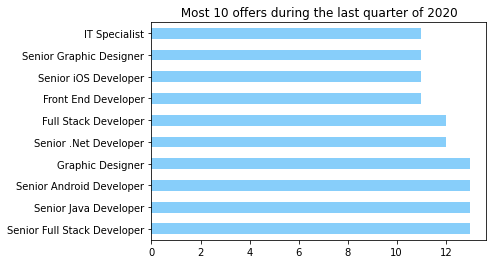

In [60]:
location = df['job_title'].value_counts()[:10]
location.plot(kind = 'barh',color = "lightskyblue",title=' Most 10 offers during the last quarter of 2020 ')

<AxesSubplot:title={'center':' Most Job category in 2020 '}>

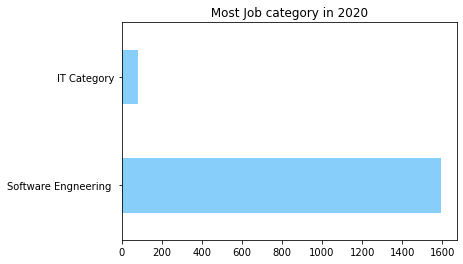

In [61]:
StandardJobTitle = df['StandardJobTitle'].value_counts()[:2]
StandardJobTitle.plot(kind = 'barh',color = "lightskyblue",title=' Most Job category in 2020 ')

<AxesSubplot:title={'center':'Most employing companies'}>

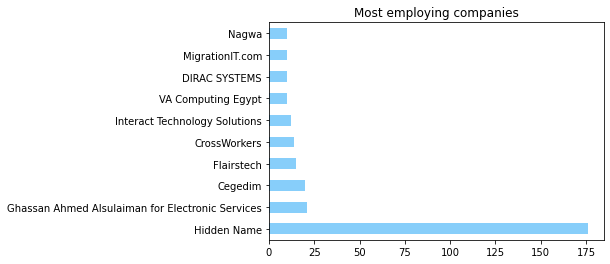

In [62]:
company = df['company'].value_counts()[:10]
company.plot(kind = 'barh',color = "lightskyblue",title='Most employing companies')

# Analysis For Managment jobs Section One || Part 4

-  Answering the Question below 
- 1- Top 10 jops 
- 2- Top 10 company  
- 3- Locations of compaines 

In [63]:
df = pd.read_csv ('./wuzzafmangerjobs2020.csv')

In [64]:
df.describe()

,job_title,company,job_profile,description,location,Level,Type,StandardJobTitle
count,421,421,421,421,421,421,421,421
unique,324,250,418,392,53,1,2,2
top,Business Development Manager,Hidden Name,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Maadi, Cairo",Manager,Full Time,Software Engneering
freq,9,63,2,6,65,421,412,390


In [65]:
df.job_title.value_counts()

Business Development Manager           9
IT Manager                             9
Sales Manager                          7
Project Manager                        7
Technical Team Lead                    7
                                      ..
Marketing Deputy Manager - Cairo       1
.Net Team Leader                       1
Maintenance Manager (Large Factory)    1
Chief Technology Officer (CTO)         1
Design Manager                         1
Name: job_title, Length: 324, dtype: int64

<AxesSubplot:title={'center':' Most Job category in 2020 '}>

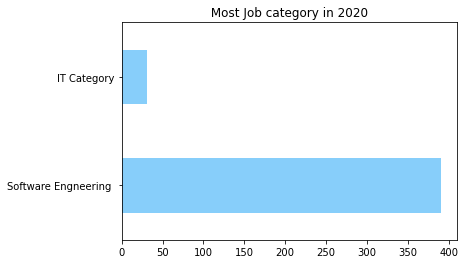

In [66]:
StandardJobTitle = df['StandardJobTitle'].value_counts()[:2]
StandardJobTitle.plot(kind = 'barh',color = "lightskyblue",title=' Most Job category in 2020 ')

<AxesSubplot:title={'center':' Most 10 offers during the last quarter of 2020 '}>

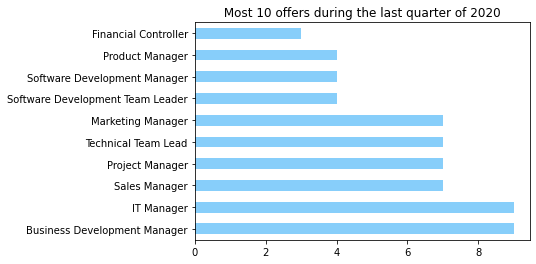

In [67]:
location = df['job_title'].value_counts()[:10]
location.plot(kind = 'barh',color = "lightskyblue",title=' Most 10 offers during the last quarter of 2020 ')

<AxesSubplot:title={'center':'Most employing companies'}>

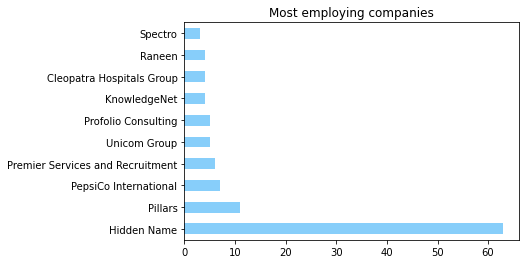

In [68]:
company = df['company'].value_counts()[:10]
company.plot(kind = 'barh',color = "lightskyblue",title='Most employing companies')

# Analysis Section || Two 
- We will perfom the same Section 1 For data set of wuzzaf 2014-2016 in next File